# Cattle Spread

In [118]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import src

import warnings
warnings.filterwarnings('ignore')

In [81]:
# Get all data available, as opposed to cutoff date of 2000
historical=True

In [83]:
# Cash price of fed / live cattle
cash_price_live = pd.read_csv('../csv/price_received_ge_500_national.csv')
cash_price_live = src.usda_clean_monthly(cash_price_live, historical=historical)

<AxesSubplot:xlabel='Date'>

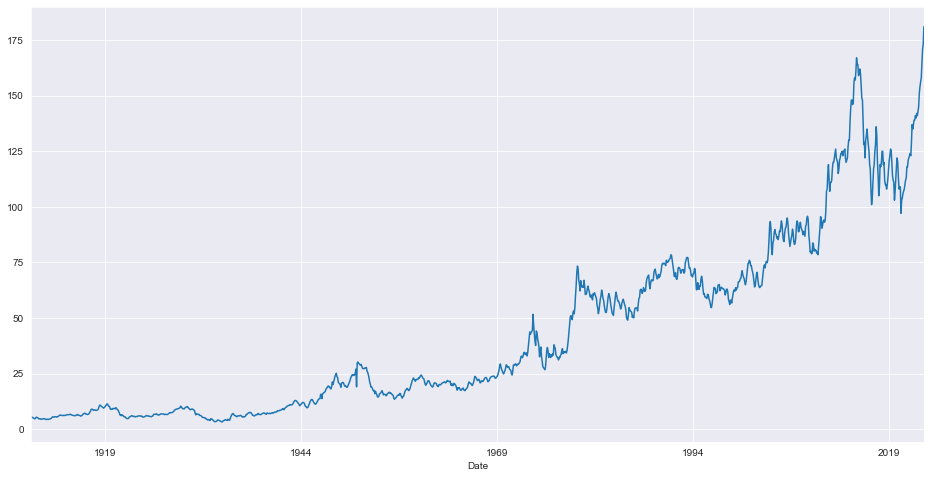

In [84]:
cash_price_live.plot()

In [87]:
cash_price_feeder = pd.read_csv('../csv/cash_price_feeder.csv')
cash_price_feeder = src.usda_clean_monthly(cash_price_feeder, historical=historical)

<AxesSubplot:title={'center':'Feeder Cattle Futures ($/cwt)'}>

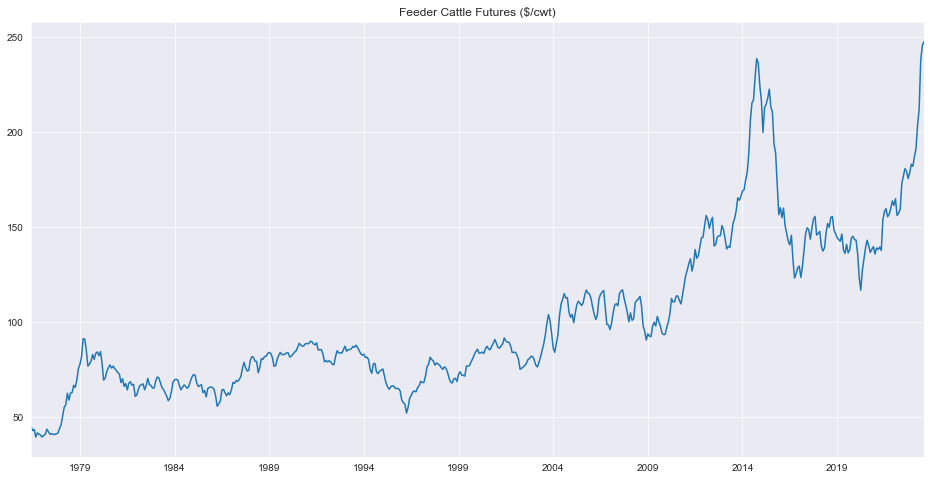

In [90]:
# Futures price of feeder cattle
# Chose to use futures price as we have data since 1976, as opposed to 1999 for cash price
# should not distort results, as they are also highly correlated on a monthly 
# level (check monthly_analysis/futures_cash_price.ipynb)

futures_feeder = pd.read_csv('../csv/feeder_cattle_futures.csv')
futures_feeder = src.clean_tv_data(futures_feeder, historical=historical)
futures_feeder = futures_feeder.resample('MS').mean()
futures_feeder.plot(title='Feeder Cattle Futures ($/cwt)')

Text(0, 0.5, '$/cwt')

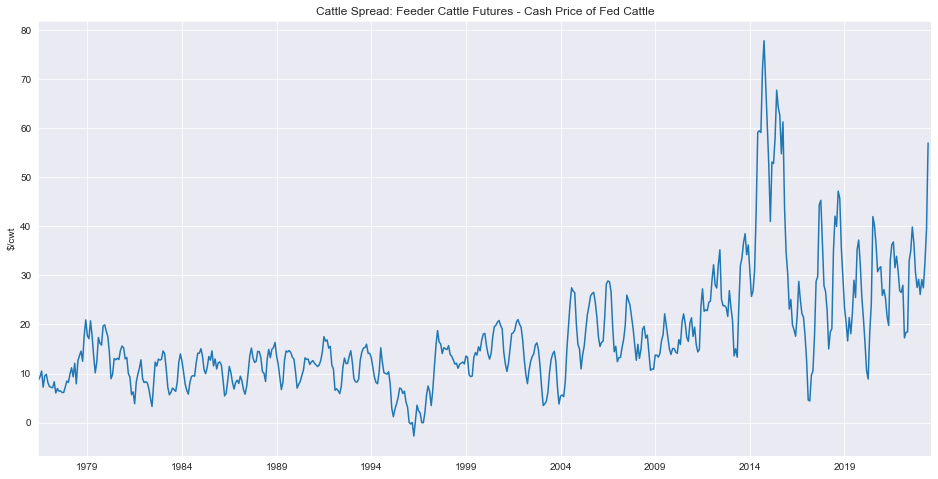

In [92]:
intersect = futures_feeder.index.intersection(cash_price_live.index)

cattle_spread = futures_feeder - cash_price_live[intersect]

cattle_spread.plot()

plt.title('Cattle Spread: Feeder Cattle Futures - Cash Price of Fed Cattle')
plt.ylabel('$/cwt')

- Upward trend is mostly due to inflation in both prices causing their difference to also inflate
- 1996 was the only year during which cattle spread was negative
    - Need to read into why

In [95]:
cattle_spread.idxmin()

Timestamp('1996-04-01 00:00:00')

<AxesSubplot:title={'center':'Cattle Spread: Feeder Cattle Futures - Cash Price of Fed Cattle (1996)'}, ylabel='$/cwt'>

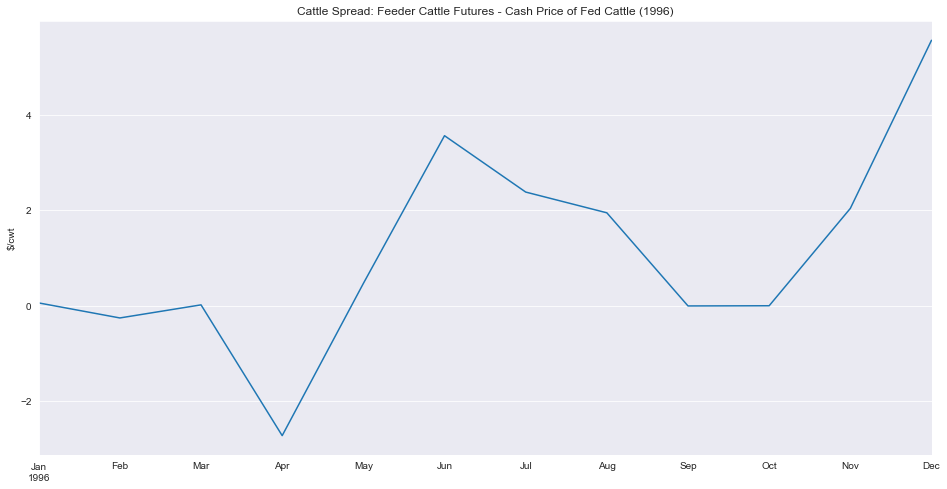

In [102]:
plt.title('Cattle Spread: Feeder Cattle Futures - Cash Price of Fed Cattle (1996)')
plt.ylabel('$/cwt')
cattle_spread[cattle_spread.index.year==1996].plot()

In [105]:
src.plot_monthly_box_chart(cattle_spread,
                           title='Cattle Spread Monthly Box Chart',
                           ylabel='$/cwt',
                            xlabel='Month',
                           )

Text(0.5, 0, 'Month')

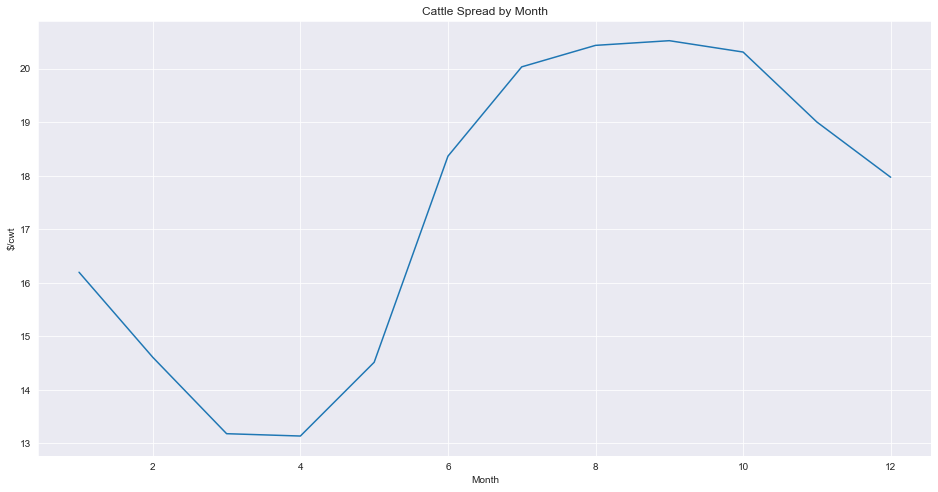

In [107]:
cattle_spread.groupby(cattle_spread.index.month).mean().plot()
plt.title('Cattle Spread by Month')
plt.ylabel('$/cwt')
plt.xlabel('Month')

- Rebase the cattle spread by dividing by the live cattle cash price (this should adjust the inflationary upward trend away)

Text(0, 0.5, '% of Live Cattle cash price')

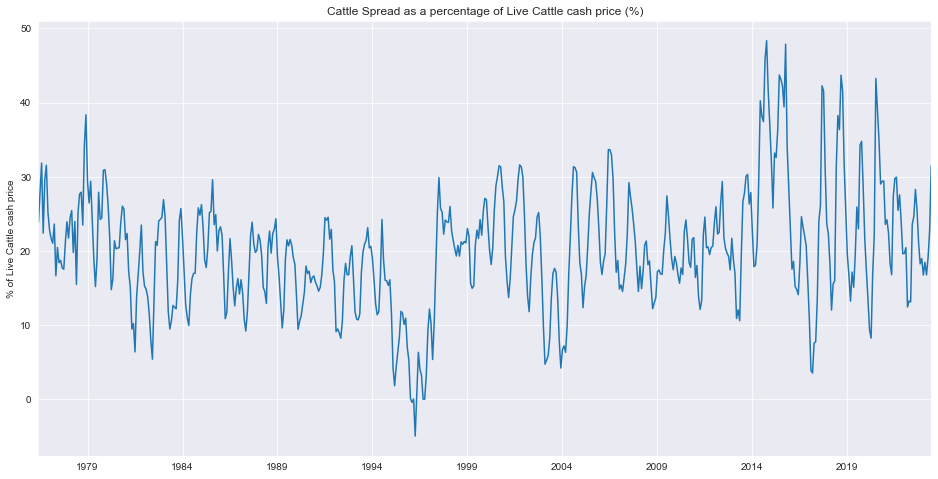

In [123]:
cattle_spread_rebased = cattle_spread / cash_price_live[intersect]
cattle_spread_rebased *= 100
cattle_spread_rebased = cattle_spread_rebased.dropna()

cattle_spread_rebased.plot()
plt.title('Cattle Spread as a percentage of Live Cattle cash price (%)')
plt.ylabel('% of Live Cattle cash price')

Text(0.5, 0, '% of Live Cattle cash price')

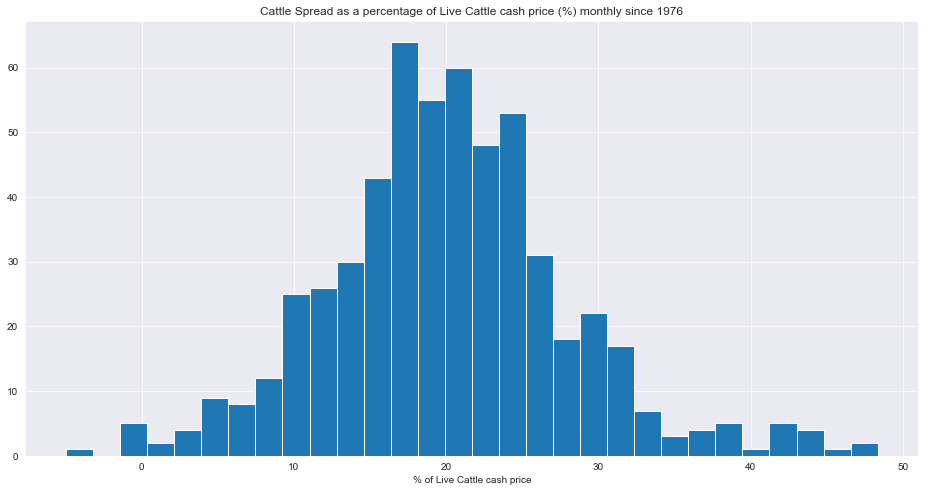

In [124]:
cattle_spread_rebased.hist(bins=30)
plt.title('Cattle Spread as a percentage of Live Cattle cash price (%) monthly since 1976')
plt.xlabel('% of Live Cattle cash price')

In [138]:
# Current spread estimate 16.9.2023
current_futures_feeder = 257.325
current_futures_live = 187.050

current_spread_rebased = (current_futures_feeder - current_futures_live)*100 / current_futures_live

print(f'Current spread estimate: {current_spread_rebased:.2f}%')

Current spread estimate: 37.57%


<AxesSubplot:>

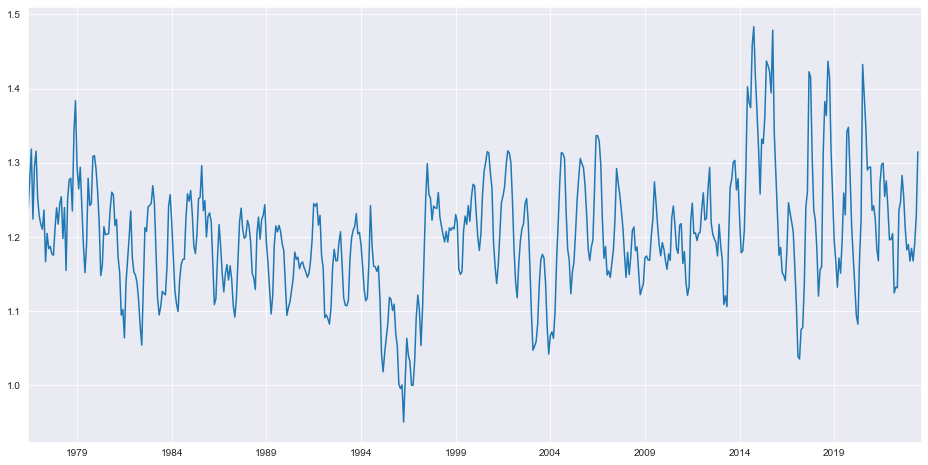

In [167]:
cattle_spread_ratio = futures_feeder / cash_price_live[intersect]

cattle_spread_ratio.plot()

<AxesSubplot:>

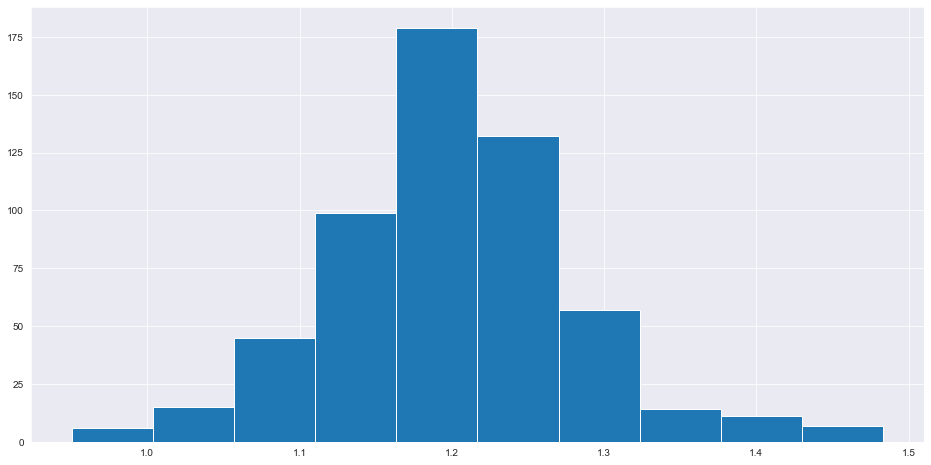

In [162]:
cattle_spread_ratio.hist()

In [163]:
# Current spread estimate 16.9.2023
current_futures_feeder = 257.325
current_futures_live = 187.050

current_spread_ratio = current_futures_feeder/current_futures_live

print(f'Current spread ratio: {current_spread_ratio:.2f}')

Current spread ratio: 1.38


In [148]:
data = cattle_spread_ratio[cattle_spread_ratio.index.month == 9]
count_below = len([x for x in data if x < current_spread_ratio])
percentage_below = (count_below / len(data)) * 100

print(f'Percentage of septembers since 1976 where spread was below current spread estimate: {percentage_below:.2f}%')

Percentage of septembers since 1976 where spread was below current spread estimate: 91.49%


<AxesSubplot:>

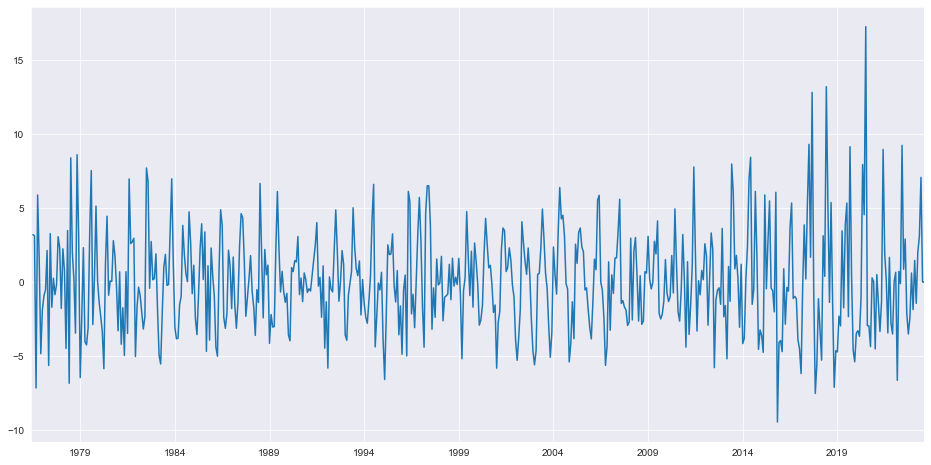

In [166]:
cattle_spread_ratio_pct_chg = cattle_spread_ratio.pct_change()*100
cattle_spread_ratio_pct_chg.plot()

Text(0, 0.5, 'Ratio')

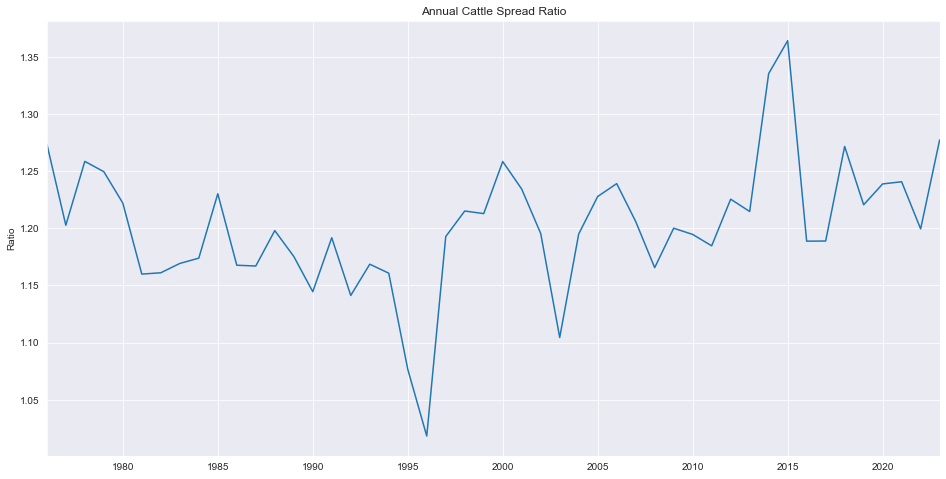

In [179]:
cattle_spread_ratio_annual = futures_feeder.resample('Y').mean() / cash_price_live[intersect].resample('Y').mean()

cattle_spread_ratio_annual.plot()

plt.title('Annual Cattle Spread Ratio')
plt.ylabel('Ratio')

Text(0, 0.5, '% change')

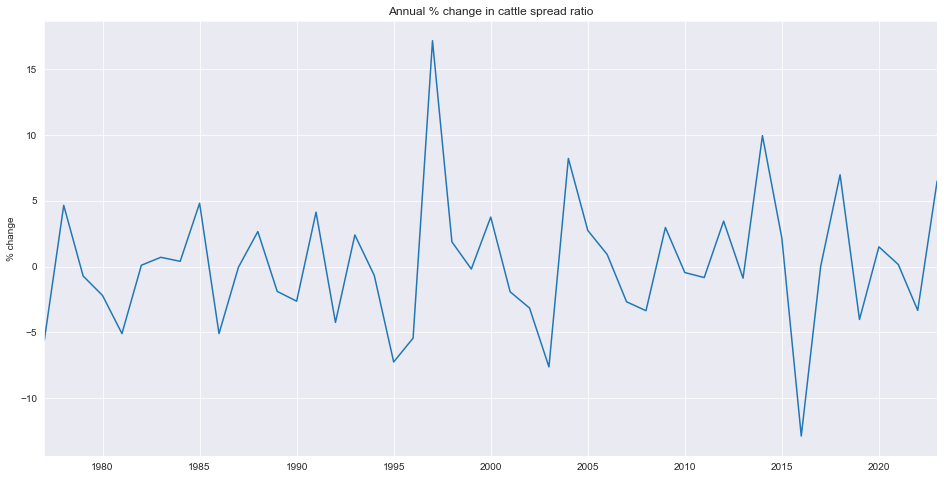

In [178]:
cattle_spread_ratio_annual_pct_chg = cattle_spread_ratio_annual.pct_change()*100
cattle_spread_ratio_annual_pct_chg = cattle_spread_ratio_annual_pct_chg.dropna()

cattle_spread_ratio_annual_pct_chg.plot()

plt.title('Annual % change in cattle spread ratio')
plt.ylabel('% change')

<AxesSubplot:>

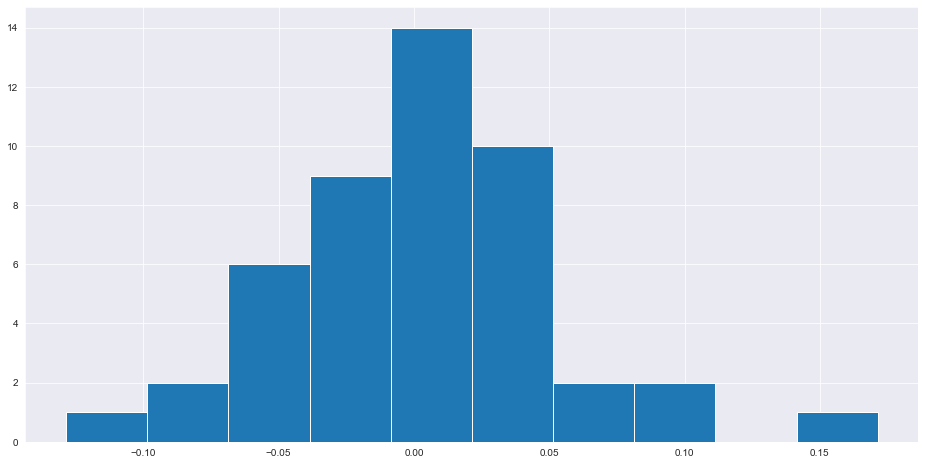

In [175]:
cattle_spread_ratio_annual_pct_chg.hist()

## Calves to On Feed Ratio

In [152]:
inventory_calves = pd.read_csv('../csv/inventory_calves.csv')
inventory_calves = src.usda_clean_biannual(inventory_calves, historical=historical)

on_feed = pd.read_csv('../csv/inventory_on_feed_biannual.csv')
on_feed = src.usda_clean_biannual(on_feed, historical=historical)

In [153]:
calve_to_on_feed_ratio_annual = inventory_calves.resample('Y').mean() /  on_feed.resample('Y').mean()
calve_to_on_feed_ratio_annual = calve_to_on_feed_ratio_annual.dropna()

<AxesSubplot:>

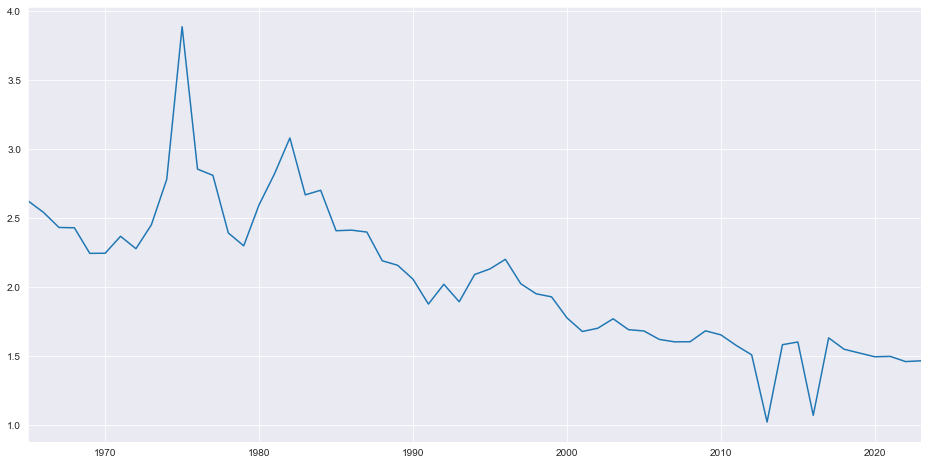

In [155]:
calve_to_on_feed_ratio_annual.plot()

<AxesSubplot:>

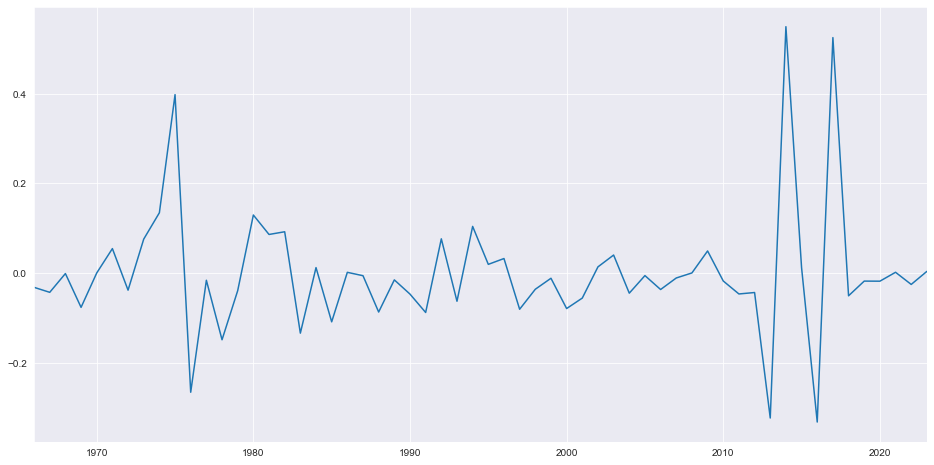

In [183]:
calve_to_on_feed_ratio_annual_pct_chg = calve_to_on_feed_ratio_annual.pct_change()
calve_to_on_feed_ratio_annual_pct_chg = calve_to_on_feed_ratio_annual_pct_chg.dropna()
calve_to_on_feed_ratio_annual_pct_chg.plot()

## Regression

- Hypothesis is that on an annual basis, a higher calves to on feed ratio will be negatively associated with feeder cattle futures to live cattle cash price

In [190]:
import statsmodels.api as sm
from statsmodels.tools import add_constant


y = cattle_spread_ratio_annual_pct_chg
X = sm.add_constant(calve_to_on_feed_ratio_annual_pct_chg[cattle_spread_ratio_annual_pct_chg.index])


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7790
Date:                Sun, 17 Sep 2023   Prob (F-statistic):              0.382
Time:                        20:47:23   Log-Likelihood:                -141.65
No. Observations:                  47   AIC:                             287.3
Df Residuals:                      45   BIC:                             291.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1498      0.735      0.204      0.8